In [ ]:
# !pip install -U tensorflow

In [9]:
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
import spacy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import re

import src.useful_codes as uc

print(tf.__version__)

2.3.1


# Data
We will be building our twitter sentiment model using a dataset that contains 1.4 million tweets provided by Kaggle. If you wish to download the dataset, you can go to this <a href='https://www.kaggle.com/kazanova/sentiment140'>LINK</a> to access the dataset.

In [2]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv('datasets/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

In [3]:
permanent

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Since we only care about the texts and their sentiments, we will drop other columns.

In [4]:
permanent = permanent[['sentiment', 'text']]

In [5]:
# Changes 0, 4 into categorical values: Negative and Positive
sentiment_dict = {0:'Negative', 4:'Positive'}
permanent['sentiment'] = permanent['sentiment'].apply(lambda x: sentiment_dict[x]);

[Text(0.5, 0, 'Sentiment'),
 Text(0, 0.5, 'Number of Tweets'),
 Text(0.5, 1.0, 'Sentiment Distribution')]

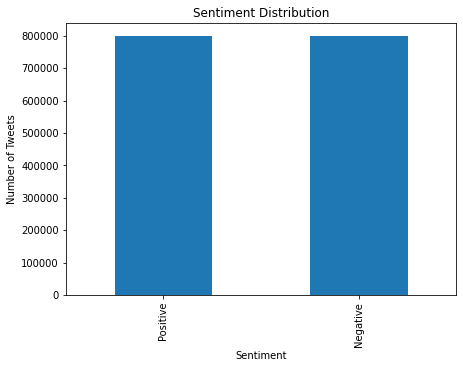

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
permanent['sentiment'].value_counts().plot(kind='bar')
ax.set(xlabel='Sentiment', ylabel='Number of Tweets', title='Sentiment Distribution')

Lovely! No class imbalance!

In [7]:
# Define X and y
X = permanent['text']
y = permanent['sentiment']

# Splits test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Splits traint set into train and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

In [8]:
# Initiates models
nb = MultinomialNB()
lr = LogisticRegression(solver='liblinear')

In [13]:
uc.evaluate_

AttributeError: module 'src.useful_codes' has no attribute 'evaluate_binary_model'